In [ ]:
import sys
import pandas as pd
sys.path.append(r'..\\.')
from src.data_pipeline import load_data, get_train_test # type: ignore
from src.supervised_model import streamline_process, display_cm, apply_PCA, save_to_joblib_object
df = load_data(r'..\\data\\processed\\clean_creditcard.csv')
df

,"cd ""Time""",V1,V2,V3,V4,V5,V6,V7,V8,V9,...,hour_of_day,is_night,amount_zscore,log_amount,amount_percentile,pca_sum,pca_abs_sum,amount_above_95th,time_cycle_sin,time_cycle_cos
0,0.0,0.724943,0.766490,0.739562,0.364738,0.763439,0.267669,0.266815,0.703577,0.475312,...,0,1,0.221690,5.014760,0.841086,14.748983,14.748983,0,0.000000,1.000000
1,0.0,0.758546,0.770067,0.705103,0.326616,0.766120,0.262192,0.264875,0.703447,0.453981,...,0,1,-0.366211,1.305626,0.179019,14.801379,14.801379,0,0.000000,1.000000
2,1.0,0.724962,0.753118,0.728466,0.323813,0.762329,0.281122,0.270177,0.705007,0.410603,...,0,1,1.138132,5.939276,0.945534,14.582775,14.582775,0,0.000000,1.000000
3,1.0,0.730125,0.765304,0.728753,0.272857,0.765647,0.275559,0.266803,0.706252,0.414999,...,0,1,0.117178,4.824306,0.812809,14.365067,14.365067,0,0.000000,1.000000
4,2.0,0.727597,0.776520,0.725201,0.324766,0.762975,0.263984,0.268968,0.700034,0.490950,...,0,1,-0.096928,4.262539,0.711063,14.963308,14.963308,0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295044,172635.0,0.639686,0.838437,0.555344,0.505144,0.707131,0.268055,0.219961,0.697513,0.330604,...,47,0,1.573777,6.191417,0.962667,14.039004,14.039004,1,-0.258819,0.965926
295045,172664.0,0.770913,0.814583,0.672630,0.517492,0.772457,0.264596,0.267766,0.662355,0.430722,...,47,0,0.571636,5.472605,0.901077,14.609080,14.609080,0,-0.258819,0.965926
295046,172683.0,0.900690,0.719866,0.867128,0.367565,0.833280,0.286405,0.337156,0.624555,0.493979,...,47,0,1.287973,6.033347,0.952825,15.065503,15.065503,1,-0.258819,0.965926
295047,172701.0,0.606401,0.814543,0.553586,0.535362,0.705393,0.239276,0.212708,0.795775,0.352356,...,47,0,0.267097,5.087400,0.854526,13.688182,13.688182,0,-0.258819,0.965926


In [20]:
X_train, X_test, y_train, y_test = get_train_test(df)
X_train = apply_PCA(X_train, 15)
X_test = apply_PCA(X_test, 15)

In [21]:
X_train

array([[-5.95108074e+04,  2.51484379e+02,  1.68499662e+00, ...,
         1.87338457e-02, -1.11324136e-02,  2.01543253e-03],
       [-5.35077986e+04,  1.39938177e+02,  1.72454174e+00, ...,
         3.36254895e-02, -3.25954521e-02,  5.80609985e-02],
       [-1.88437801e+04, -8.37840138e+01, -4.68954997e-01, ...,
         9.08244106e-02,  8.30750470e-02,  5.05463133e-03],
       ...,
       [-1.47227794e+04, -9.11949920e+01, -1.38766469e+00, ...,
        -1.43679550e-02,  2.69667485e-02, -1.98151363e-02],
       [-6.58677892e+03, -9.35212334e+01, -2.26862889e+00, ...,
         9.78677060e-02,  1.18467942e-01,  7.69721922e-02],
       [-1.81367878e+04,  1.76181135e+01,  1.39464254e+00, ...,
        -1.76650104e-02,  2.81089760e-02,  6.24538790e-02]],
      shape=(236039, 15))

In [22]:
X_test

array([[ 5.02958798e+04, -3.22177002e+01,  1.11779157e+00, ...,
         5.88271017e-02,  8.20286575e-02,  4.20496628e-02],
       [-5.15521206e+04, -9.71366846e+01, -2.16661993e+00, ...,
         1.77298310e-02, -3.14234530e-02,  4.86364088e-02],
       [ 5.47788834e+04, -8.97613084e+01, -1.70332826e+00, ...,
        -5.48272971e-02, -5.51384848e-02,  2.66101696e-02],
       ...,
       [ 6.17358837e+04, -8.93430828e+01, -1.72798654e+00, ...,
        -1.94646434e-02,  7.23108659e-03,  4.59466798e-03],
       [-1.53011190e+04, -9.49571586e+01, -2.23200787e+00, ...,
        -1.69505995e-01, -2.42260622e-02,  6.88420918e-02],
       [-4.42091293e+04,  5.73237349e+01,  1.58922193e+00, ...,
        -4.78050153e-02, -1.64150584e-01,  1.22988046e-02]],
      shape=(59010, 15))

In [23]:
y_train

28434     0
42235     0
120000    0
127812    0
47810     0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: Class, Length: 236039, dtype: int64

In [24]:
y_test

227088    0
47101     0
237827    0
141658    0
101322    0
         ..
156447    0
256921    0
253701    0
130326    0
62777     0
Name: Class, Length: 59010, dtype: int64

In [25]:
model_to_be_used, all_models = streamline_process(X_train, y_train)

c:\Users\Alffo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Alffo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sciki

In [26]:
print("Best model parameters:", all_models.best_params_)
print("Model score:", all_models.best_score_)

Best model parameters: {'classifier__C': 0.5, 'classifier__penalty': 'l2', 'classifier__tol': 0.0}
Model score: 0.663634664382202


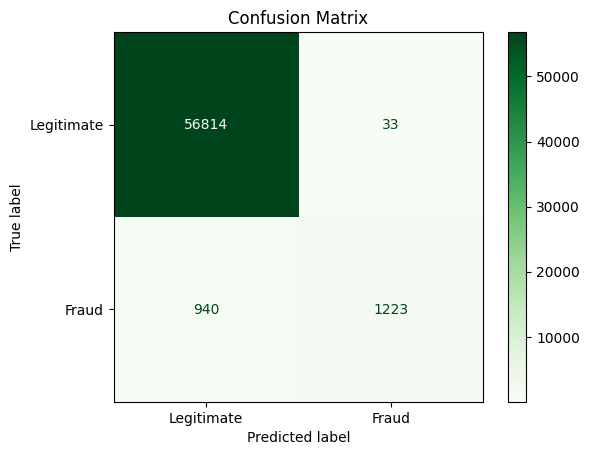

In [27]:
display_cm(model_to_be_used, X_test, y_test)

In [ ]:
save_to_joblib_object(model_to_be_used, "..\\models")